# Введение в объектно-ориентированное программирование на Python

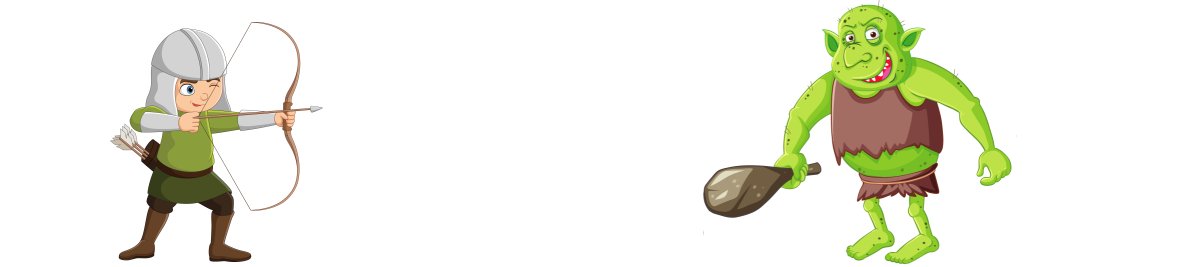

### Цель:

Понимать, что это такое выводится на экран:

In [2]:
dir(set)

['__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']

## Три кита ООП:

### Инкапсуляция

### Наследование

### Полиморфизм*

<div align="right">
* не сегодня :(
</div>

**Инкапсуляция** $-$ размещение в одном компоненте данных и методов, которые с ними работают.

В Python для создания таких объектов служат ***классы***.

In [3]:
class Man:
    def __init__(self, name):
        """
        создание человека
        """
        self.name = name

Кому-то более понятно было бы так:
```python
    def __init__(self, given_name):
        self.name = given_name
```
Но принято именно так, как вверху

In [4]:
# И уже можно работать:
man1 = Man('Петр')
man2 = Man('Мария')

In [12]:
dir(man2)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'name',
 'set_age']

In [7]:
print(man1)

Расширим параметры человека)

In [8]:
class Man:
    def __init__(self, name):
        self.name = name
    def set_age(self, age):
        self.age = age        

In [9]:
man1 = Man('Peter')
man2 = Man('Mary')
print(man2.age)

AttributeError: 'Man' object has no attribute 'age'

In [10]:
man2.set_age(20)

In [11]:
print(man2.age)

20


Переопределяем стандартный метод

In [17]:
class Man:
    def __init__(self, name):
        self.name = name
    def set_age(self, age):
        self.age = age  
    
    def __str__(self):
        if self.age<20:
            return f'Little {self.name}'
        elif self.age<50:   
            return f'Brave {self.name}'
        else:
            return f'Old {self.name}'

In [14]:
man1 = Man('Peter')
man1.set_age(10)
print(man1)

Little Peter


In [15]:
man1.set_age(25)
print(man1)

Brave Peter


In [16]:
man1.set_age(70)
print(man1)

Old Peter


**Наследование** позволяет создавать новый класс на основе уже существующего класса и использовать его поля и методы 

Мы создадим класс `Hero` на основе класса `Man`. Хотя орк на человека не сильно похож...

Характеристики героя:
- Имя
- Возраст
- Раса
- Здоровье
- Атака
- Защита
- Наносимый урон
- Ловкость (повышает шанс уклониться и шанс нанести критический удар)
- И пока без магии. И пока без уровня, без очков опыта и тд.

In [18]:
class Hero(Man):
    def __init__(self, 
                 name='Иван', 
                 age=25, 
                 race='человек', 
                 health=10, attack=1, defence=1, 
                 damage=[0,1], dexterity=0):
        # работает наследование
        super().__init__(name)
        super().set_age(age)

In [19]:
h1 = Hero()
print(h1) # сработает метод __str__ "родителя"

Brave Иван


Переходим к более детальной реализации класса `Hero`

In [24]:
import random
RED = '\033[;1;30;41m'
class Hero(Man):
    def __init__(self, 
                 name='Иван', 
                 age=25, 
                 race='человек', 
                 health=10, attack=1, defence=1, 
                 damage=[0,1], dexterity=0):
        # работает наследование
        super().__init__(name)
        super().set_age(age)
        # Параметры наследника
        self.race = race
        self.health = health
        self.attack = attack
        self.defence = defence
        self.damage = damage
        self.dexterity = dexterity
   
    def strikes(self:Hero, other:Hero):
        print(f'{self} атакует!')
        coeff = 1+(self.attack - other.defence)/100
        coeff = min(coeff, 2)      # Коэффициент атаки не больше двух
        coeff = max(coeff, 0.25)   #      и не меньше четверти
        amin = coeff*self.damage[0]
        amax = coeff*self.damage[1]
        damage = round((amax-amin)*random.random()+amin)
        # dexterity - шанс крита (процент)
        if random.randint(1,100)<=self.dexterity:
            print(f'{self} наносит критический удар (удвоение урона)!')
            damage = 2*damage
        if random.randint(1,100)<=other.dexterity:
            print(f'{other}: удалось чуть увернуться от удара!')
            damage = damage//10
        other.health -= damage
        
        
        

In [22]:
from time import sleep

archer = Hero('Робин', age=17, race='человек', health=50, 
              attack=5, defence=5, damage=[5,20], dexterity=50)
warrior = Hero('Грррых', age=60, race='огр', health=100, 
               attack=10, defence=10, damage=[15,20])

for i in range(1,11):
    if i>1:
        sleep(5)   
    print(f'----------------------------------------------- Раунд {i}')
    archer.strikes(warrior)
    if warrior.health<=0:
        print(RED+f'{warrior} - повержен.')
        break 
    else:
        print(f'{warrior} получил урон. Его здоровье - {warrior.health} hp.')
    warrior.strikes(archer)
    if archer.health<=0:
        print(RED+f'{archer} - повержен.')
        break
    else:    
        print(f'{archer} получил урон. Его здоровье - {archer.health} hp.')       

----------------------------------------------- Раунд 1
Little Робин атакует!
Old Грррых получил урон. Его здоровье - 87 hp.
Old Грррых атакует!
Little Робин получил урон. Его здоровье - 32 hp.
----------------------------------------------- Раунд 2
Little Робин атакует!
Little Робин наносит критический удар (удвоение урона)!
Old Грррых получил урон. Его здоровье - 53 hp.
Old Грррых атакует!
Little Робин: удалось чуть увернуться от удара!
Little Робин получил урон. Его здоровье - 31 hp.
----------------------------------------------- Раунд 3
Little Робин атакует!
Little Робин наносит критический удар (удвоение урона)!
Old Грррых получил урон. Его здоровье - 31 hp.
Old Грррых атакует!
Little Робин: удалось чуть увернуться от удара!
Little Робин получил урон. Его здоровье - 29 hp.
----------------------------------------------- Раунд 4
Little Робин атакует!
Old Грррых получил урон. Его здоровье - 24 hp.
Old Грррых атакует!
Little Робин: удалось чуть увернуться от удара!
Little Робин полу

https://stackabuse.com/how-to-print-colored-text-in-python/

In [23]:
def colors_16(color_):
    return("\033[2;{num}m {num} \033[0;0m".format(num=str(color_)))


def colors_256(color_):
    num1 = str(color_)
    num2 = str(color_).ljust(3, ' ')
    if color_ % 16 == 0:
        return(f"\033[38;5;{num1}m {num2} \033[0;0m\n")
    else:
        return(f"\033[38;5;{num1}m {num2} \033[0;0m")

print("The 16 colors scheme is:")
print(' '.join([colors_16(x) for x in range(30, 38)]))
print("\nThe 256 colors scheme is:")
print(' '.join([colors_256(x) for x in range(256)]))

The 16 colors scheme is:
 30   31   32   33   34   35   36   37 

The 256 colors scheme is:
 0   
  1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16  
  17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32  
  33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48  
  49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64  
  65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80  
  81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96  
  97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112 
  113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128 
  129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144 
  145   146   147   148   149